In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
print (os.listdir())
#covid 0, normal 1

['.ipynb_checkpoints', 'Augmentations', 'b1.jfif', 'b4.jpg', 'Breast Cancer ImageDataGen style.ipynb', 'Image Augmentation Code.ipynb', 'm21.jpg', 'm51.jpg', 'model', 'Model Testing.ipynb', 'python.py', 'static', 'templates', 'Test', 'Train', 'Ultrasound Classification .ipynb', 'us-dataset.zip']


In [3]:
data = []
labels = []
classes = 3

In [4]:
for i in range(classes):
    path = os.path.join('D:/DATA SCIENCE/DataSets/Research/Breast Cancer Ultrasound','Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a).convert("RGB")
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [5]:
data = np.array(data)
labels = np.array(labels)

In [6]:
data

array([[[[146, 146, 146],
         [185, 185, 185],
         [169, 169, 169],
         ...,
         [188, 188, 188],
         [181, 181, 181],
         [179, 179, 179]],

        [[144, 144, 144],
         [139, 139, 139],
         [113, 113, 113],
         ...,
         [142, 142, 142],
         [155, 155, 155],
         [159, 159, 159]],

        [[134, 134, 134],
         [135, 135, 135],
         [122, 122, 122],
         ...,
         [153, 153, 153],
         [144, 144, 144],
         [117, 117, 117]],

        ...,

        [[117, 117, 117],
         [116, 116, 116],
         [114, 114, 114],
         ...,
         [ 64,  64,  64],
         [ 61,  61,  61],
         [ 62,  62,  62]],

        [[104, 104, 104],
         [104, 104, 104],
         [ 99,  99,  99],
         ...,
         [ 73,  73,  73],
         [ 65,  65,  65],
         [ 63,  63,  63]],

        [[101, 101, 101],
         [ 98,  98,  98],
         [ 90,  90,  90],
         ...,
         [ 42,  42,  42],
        

In [7]:
#data = data / data.max()

In [8]:
#data

In [9]:
labels

array([0, 0, 0, ..., 2, 2, 2])

In [10]:
os.mkdir('modelimprovement')

np.save('./model/data',data)
np.save('./model/target',labels)

In [11]:
data=np.load('./model/data.npy')
labels=np.load('./model/target.npy')

In [12]:
print(data.shape, labels.shape)

(2511, 30, 30, 3) (2511,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2008, 30, 30, 3) (503, 30, 30, 3) (2008,) (503,)


## Convert labels to onehot encoding

In [15]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

In [18]:
from tensorflow.keras.optimizers import Adam
# Learning Rate and Decay Rate: Reduce the learning rate, a good starting value is usually between 0.0005 to 0.001.
# Also consider a decay rate of 1e-6.

In [19]:
lr= 0.05
epochs = 50

In [20]:
#opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, batch_size=50, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/50
41/41 [==============================] - 9s 176ms/step - loss: 6.4799 - accuracy: 0.2912 - val_loss: 1.6305 - val_accuracy: 0.3499
Epoch 2/50
41/41 [==============================] - 6s 157ms/step - loss: 1.5009 - accuracy: 0.3409 - val_loss: 1.3140 - val_accuracy: 0.3658
Epoch 3/50
41/41 [==============================] - 7s 164ms/step - loss: 1.3725 - accuracy: 0.3423 - val_loss: 1.3285 - val_accuracy: 0.4235
Epoch 4/50
41/41 [==============================] - 5s 121ms/step - loss: 1.2905 - accuracy: 0.3605 - val_loss: 1.1951 - val_accuracy: 0.4076
Epoch 5/50
41/41 [==============================] - 5s 117ms/step - loss: 1.2275 - accuracy: 0.3842 - val_loss: 1.1180 - val_accuracy: 0.4831
Epoch 6/50
41/41 [==============================] - 6s 143ms/step - loss: 1.1399 - accuracy: 0.4190 - val_loss: 1.0560 - val_accuracy: 0.4930
Epoch 7/50
41/41 [==============================] - 6s 155ms/step - loss: 1.1048 - accuracy: 0.4440 - val_loss: 1.0237 - val_accuracy: 0.5427
Epoch 

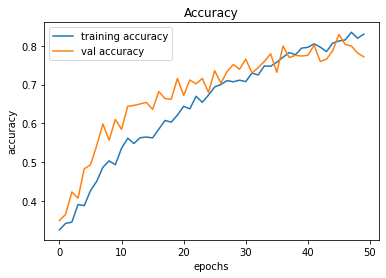

In [22]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

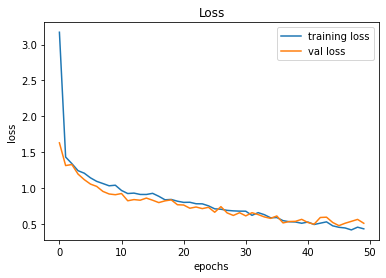

In [23]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

## Save the model

In [24]:
model.save("./modelimprovement/model.h5")

## Load the Model

In [25]:
import os
os.chdir(r'D:\DATA SCIENCE\DataSets\Research\Projects')
from keras.models import load_model
model = load_model(r'D:\DATA SCIENCE\DataSets\Research\Breast Cancer Ultrasound\modelimprovement\model.h5')

In [26]:
classes = { 0:'Benign',
            1:'Malignant',
            2:'Normal'}

In [27]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30)).convert("RGB")
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

C:\Users\Rahul\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predicted Ultra sound image is :  Benign


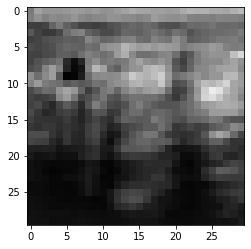

In [28]:
plot,prediction = test_on_img(r'D:\DATA SCIENCE\DataSets\Research\Breast Cancer Ultrasound\Test\0\benign (95).png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted Ultra sound image is : ", classes[a])
plt.imshow(plot)
plt.show()

Predicted Ultra sound image is :  Malignant


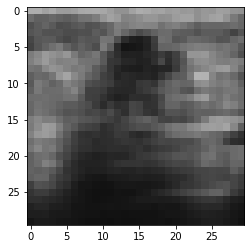

In [29]:
plot,prediction = test_on_img(r'D:\DATA SCIENCE\DataSets\Research\Breast Cancer Ultrasound\Test\1\malignant (155).png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted Ultra sound image is : ", classes[a])
plt.imshow(plot)
plt.show()
# 1 wrong prediction

Predicted Ultra sound image is :  Normal


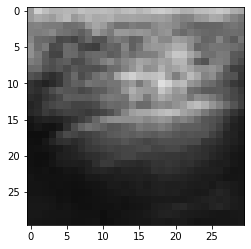

In [30]:
plot,prediction = test_on_img(r'D:\DATA SCIENCE\DataSets\Research\Breast Cancer Ultrasound\Test\2\normal (133).png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted Ultra sound image is : ", classes[a])
plt.imshow(plot)
plt.show()

In [38]:
folder_path=(r'D:\DATA SCIENCE\DataSets\Research\Breast Cancer Ultrasound\Test\0')

In [39]:
# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    image = Image.open(img)
    image = image.resize((30,30))
    image = np.expand_dims(image, axis=0)
    images.append(np.array(image))

In [40]:
# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)

[0 0 0 0 0 0 0]


In [41]:
#30,30 model, Previously Trained model gave the below accuracy 
#Epoch 50/50
#33/33 [==============================] - 3s 101ms/step - loss: 0.3501 - accuracy: 0.8667 - val_loss: 0.4979 - val_accuracy: 0.8217